> # **CLASSIFICATION METRICS**
> Classification Metrics are used to evaluate the `performance of models` by comparing the predicted labels to the actual labels. These metrics can vary depending on whether the classification problem is binary (two classes) or multiclass (more than two classes).

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import recall_score,precision_score,f1_score

In [7]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
clf1 = LogisticRegression(max_iter=5000)
clf2 = DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

<hr>

> ### BINARY CLASSIFICATION METRICS
> `Accuracy` The ratio of correctly predicted instances to the total instances.<br><br>
> 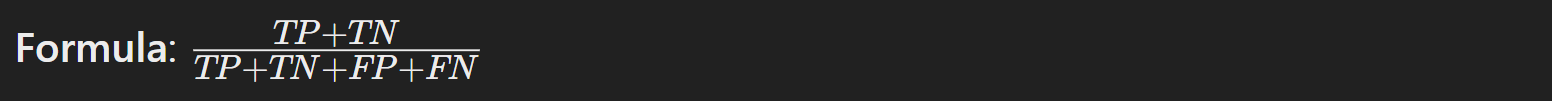

In [11]:
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.956140350877193
Accuracy of Decision Trees 0.9298245614035088


> Accuracy, while a commonly used metric, has several disadvantages, especially in certain scenarios.
> - `CLASS IMBALANCE` : In cases where classes are highly imbalanced (e.g., a dataset where 95% of instances belong to one class and only 5% to another), a model that always predicts the majority class can still achieve high accuracy. This is because accuracy does not account for the distribution of classes.
> - `CLASS IMPORTANCE` : Accuracy treats all classes as equally important and does not account for the varying importance of different types of errors. In many real-world applications, some classes are more critical to predict correctly than others.

<HR>

> `CONFUSION MATRIX` A table that summarizes the performance of a classification algorithm by showing the counts of true positives, true negatives, false positives, and false negatives for each class.

In [17]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2))).rename(
    columns={0:'Actual True', 1:'Actual False'},
    index={0:'Predicted True', 1:'Predicted False'}
)

Logistic Regression Confusion Matrix



,Actual True,Actual False
Predicted True,39,4
Predicted False,1,70


In [16]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2))).rename(
    columns={0:'Actual True', 1:'Actual False'},
    index={0:'Predicted True', 1:'Predicted False'}
)

Decision Tree Confusion Matrix



,Actual True,Actual False
Predicted True,39,4
Predicted False,4,67


<HR>

> `PRECISION SCORE`: The ratio of true positive predictions to the total predicted positives. <BR><BR>
> 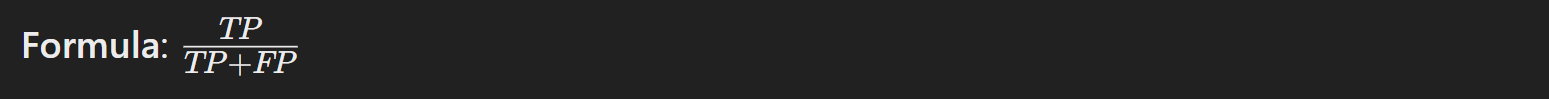

In [20]:
print("Precision of 'Logistic Regression' :",precision_score(y_test,y_pred1))

Precision of 'Logistic Regression' : 0.9459459459459459


In [21]:
print("Precision of 'Decision Tree' :",precision_score(y_test,y_pred2))

Precision of 'Decision Tree' : 0.9436619718309859


> Behind the scene the precision and recall will be calculated from both True and False class

In [24]:
precision_score(y_test,y_pred1,average=None)

array([0.975     , 0.94594595])

In [25]:
precision_score(y_test,y_pred2,average=None)

array([0.90697674, 0.94366197])

<hr>

> `RECALL` : The ratio of true positive predictions to the total actual positives.<BR><BR>
> 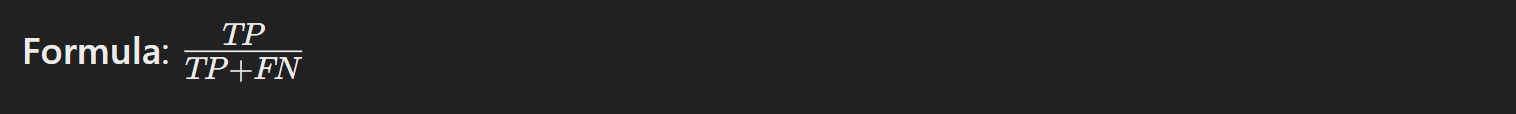

In [22]:
print("Recall of 'Logistic Regression' :",recall_score(y_test,y_pred1))

Recall of 'Logistic Regression' : 0.9859154929577465


In [23]:
print("Recall of 'Decison Trees' :",recall_score(y_test,y_pred2))

Recall of 'Decison Trees' : 0.9436619718309859


> Behind the seans the precision and recall will be calculated from both True and False class

In [26]:
recall_score(y_test,y_pred1,average=None)

array([0.90697674, 0.98591549])

In [27]:
recall_score(y_test,y_pred2,average=None)

array([0.90697674, 0.94366197])

<hr>

> `F1-SCORE` : The harmonic mean of Precision and Recall. It balances the two metrics.<BR><BR>
> 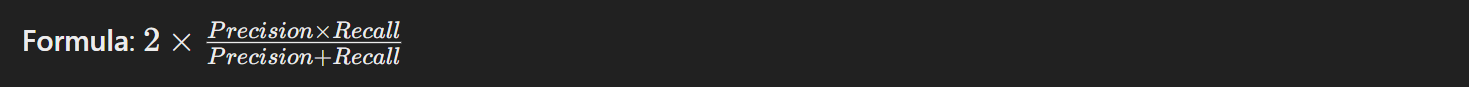

In [29]:
print("F1-score of 'Logistic Regression' :",f1_score(y_test,y_pred1))
print("F1-score of 'Decision Trees' :",f1_score(y_test,y_pred2))

F1-score of 'Logistic Regression' : 0.9655172413793104
F1-score of 'Decision Trees' : 0.9436619718309859


In [32]:
print("F1-score of 'Logistic Regression' :",f1_score(y_test,y_pred1, average=None))
print("F1-score of 'Decision Trees' :",f1_score(y_test,y_pred2, average=None))

F1-score of 'Logistic Regression' : [0.93975904 0.96551724]
F1-score of 'Decision Trees' : [0.90697674 0.94366197]


<hr>

> ### MULTICLASS CLASSIFICATION

In [39]:
from sklearn.datasets import load_iris
data = load_iris(as_frame= True)
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
clf1 = LogisticRegression(max_iter=5000)
clf2 = DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

> ### CONFUSION MATRIX

In [41]:
pd.DataFrame(confusion_matrix(y_test, y_pred1))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [42]:
pd.DataFrame(confusion_matrix(y_test, y_pred2))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


> ### PRECISION, RECALL and F1-SCORE
> - `Definition`: For each class, the ratio of true positive predictions to the total predicted positives. Can be averaged over classes.<br><br>
> - `Macro-Averaged Precision`: The arithmetic mean of precision across all classes.
> 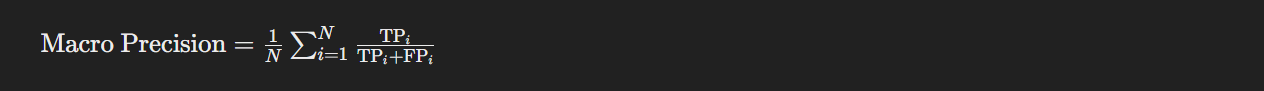<br><br>
> - `Micro-Averaged Precision`: Aggregates the contributions of all classes to compute the average precision.
> 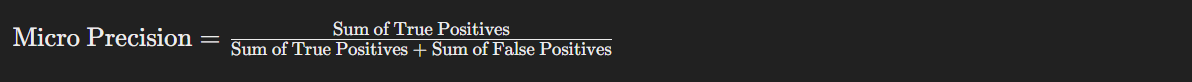
> In micro precision, you aggregate the true positives and false positives across all classes and then compute the precision.<br><br> 
> - `Weighted-Averaged Precision`: Takes into account the number of true instances for each class to calculate the average precision.
> 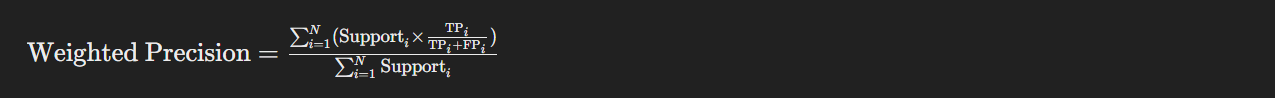

In [48]:
print(precision_score(y_test,y_pred1,average=None))
print(recall_score(y_test,y_pred1,average=None))
print(f1_score(y_test,y_pred1,average=None))

[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]


In [49]:
print(precision_score(y_test,y_pred1,average='weighted'))
print(recall_score(y_test,y_pred1,average='weighted'))
print(f1_score(y_test,y_pred1,average='weighted'))

1.0
1.0
1.0


In [50]:
print(precision_score(y_test,y_pred1,average='macro'))
print(recall_score(y_test,y_pred1,average='macro'))
print(f1_score(y_test,y_pred1,average='macro'))

1.0
1.0
1.0


In [51]:
print(precision_score(y_test,y_pred1,average='micro'))
print(recall_score(y_test,y_pred1,average='micro'))
print(f1_score(y_test,y_pred1,average='micro'))

1.0
1.0
1.0
